In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# The goal is to analyze the 'Sales Report' dataset. 
# To ask the right questions relavant to the task.
# I will use Pandas analyzation tool for loading, cleaning and preprocesing the data. Further I will use Seaborn and Matplotlib for visualization.

**Downloading the 'Sales Report' dataset!**

In [1]:
import pandas as pd
df=pd.read_excel('/kaggle/input/sales-report/Sales_reporting.xlsx')
df.head()

,Date,Client,Contact,Department,Payment,Revenue,Profit,Profit Margin
0,2023-05-30,"AMAZON.COM, INC. (XNAS:AMZN)",Bill SmITH,Cloud Tech_Texas,Transfer,4500.0,598,0.132889
1,2023-05-30,"TESLA, INC. (XNAS:TSLA)",KEN Singh,Strategy_New York,PayPal,3800.0,1045,0.275000
2,2023-05-30,"NETFLIX, INC. (XNAS:NFLX)",Harley Fritz,Strategy_New York,NaN,3712.5,1009,0.271785
3,2023-05-30,THE PROCTER & GAMBLE COMPANY (XNYS:PG),Nyla Novak,Operations_Florida,NaN,NaN,779,NaN
4,2023-05-30,"THE GOLDMAN SACHS GROUP, INC. (XNYS:GS)",David Rasmussen,Operations_Florida,Check,5000.0,684,0.136800


**Data Cleaning**

In [2]:
#From column 'Client' deleting all parenthesis and everything inside them

# Importing re package for using regular expressions
import re
 
# Function to clean the names
def Clean_names(clean_parenthesis):
    # Search for opening bracket in the name followed by
    # any characters repeated any number of times
    if re.search('\(.*', clean_parenthesis):
 
        # Extract the position of beginning of pattern
        pos = re.search('\(.*', clean_parenthesis).start()
 
        # return the cleaned name
        return clean_parenthesis[:pos]
 
    else:
        # if clean up needed return the same name
        return clean_parenthesis
         
# Updated the city columns
df['Client'] = df['Client'].apply(Clean_names)

df.head()

,Date,Client,Contact,Department,Payment,Revenue,Profit,Profit Margin
0,2023-05-30,"AMAZON.COM, INC.",Bill SmITH,Cloud Tech_Texas,Transfer,4500.0,598,0.132889
1,2023-05-30,"TESLA, INC.",KEN Singh,Strategy_New York,PayPal,3800.0,1045,0.275000
2,2023-05-30,"NETFLIX, INC.",Harley Fritz,Strategy_New York,NaN,3712.5,1009,0.271785
3,2023-05-30,THE PROCTER & GAMBLE COMPANY,Nyla Novak,Operations_Florida,NaN,NaN,779,NaN
4,2023-05-30,"THE GOLDMAN SACHS GROUP, INC.",David Rasmussen,Operations_Florida,Check,5000.0,684,0.136800


In [5]:
#Separeting column 'Department' on two new columns - Department_Name and Department_Branch

new=df['Department'].str.split('_',n=1, expand=True)
df['Department_Name'] = new[0]
df['Department_Branch'] = new[1]
df.drop(columns=['Department'], inplace=True)
df.head()

,Date,Client,Contact,Payment,Revenue,Profit,Profit Margin,Cost,Department_Name,Department_Branch
0,2023-05-30,"AMAZON.COM, INC.",Bill Smith,Transfer,4500.0,598,0.13,3902.0,Cloud Tech,Texas
1,2023-05-30,"TESLA, INC.",Ken Singh,PayPal,3800.0,1045,0.28,2755.0,Strategy,New York
2,2023-05-30,"NETFLIX, INC.",Harley Fritz,NaN,3712.5,1009,0.27,2703.5,Strategy,New York
3,2023-05-30,THE PROCTER & GAMBLE COMPANY,Nyla Novak,NaN,NaN,779,NaN,NaN,Operations,Florida
4,2023-05-30,"THE GOLDMAN SACHS GROUP, INC.",David Rasmussen,Check,5000.0,684,0.14,4316.0,Operations,Florida


In [3]:
# The Contact names formating into proper form
df['Contact']=df['Contact'].str.title()
df.head(3)

,Date,Client,Contact,Department,Payment,Revenue,Profit,Profit Margin
0,2023-05-30,"AMAZON.COM, INC.",Bill Smith,Cloud Tech_Texas,Transfer,4500.0,598,0.132889
1,2023-05-30,"TESLA, INC.",Ken Singh,Strategy_New York,PayPal,3800.0,1045,0.275000
2,2023-05-30,"NETFLIX, INC.",Harley Fritz,Strategy_New York,NaN,3712.5,1009,0.271785


In [14]:
#It seems that NaN values are in a very small percentage 
df.isna().sum()

Date                 0
Client               0
Contact              0
Payment              2
Revenue              2
Profit               0
Profit Margin        2
Department_Name      0
Department_Branch    0
dtype: int64

In [6]:
#creating field 'Cost'
df['Cost'] = df['Revenue'] - df['Profit']

#rounding up 'Profit Margin' on two numbers
df['Profit Margin'] = df['Profit Margin'].round(2)

#dropping all duplicate values
df=df.loc[~df.duplicated()]. reset_index(drop=True)

#reordering the position of columns
df=df[['Date', 'Client', 'Contact', 'Payment','Department_Name', 'Department_Branch',
       'Revenue', 'Profit', 'Cost',
       'Profit Margin']]
df.head(2)

,Date,Client,Contact,Payment,Department_Name,Department_Branch,Revenue,Profit,Cost,Profit Margin
0,2023-05-30,"AMAZON.COM, INC.",Bill Smith,Transfer,Cloud Tech,Texas,4500.0,598,3902.0,0.13
1,2023-05-30,"TESLA, INC.",Ken Singh,PayPal,Strategy,New York,3800.0,1045,2755.0,0.28


# Visualization

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [28]:
num_of_clients=df.Client.nunique()
print('Number of Clients is:',num_of_clients)
profit_sum=df.Profit.sum()
print('Sum of Profit for the company is:',profit_sum)

client_profit=df.groupby('Client')['Profit'].sum()
biggest_client= df.loc[df['Profit'] == client_profit.max(), 'Client'].iloc[0]
print('The biggest companies client is:',biggest_client)

client_profit_margin=df.groupby('Client')['Profit Margin'].mean()
biggest_client_profit_margin=df.loc[df['Profit Margin']== client_profit_margin.max(),'Client'].iloc[0]
print('Client with the biggest profit margin is:',biggest_client_profit_margin)

df3=df.groupby('Department_Branch')['Profit'].sum().reset_index()
branch=df3.loc[df3['Profit']==df3.Profit.min(),'Department_Branch'].squeeze()
print('The worse profitable branch is in:',branch)

Number of Clients is: 28
Sum of Profit for the company is: 28845
The biggest companies client is: CITIGROUP INC. 
Client with the biggest profit margin is: CITIGROUP INC. 
The worse profitable branch is in: Florida


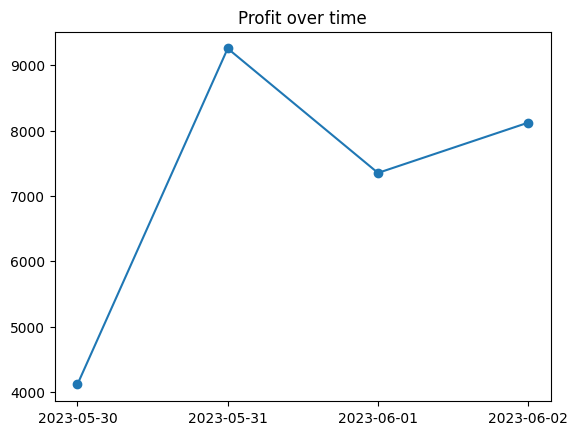

In [17]:

linep=df.groupby("Date")["Profit"].sum()

plt.plot(linep, marker='o', linestyle='-')
ax = plt.gca()

formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.title('Profit over time')

plt.show()


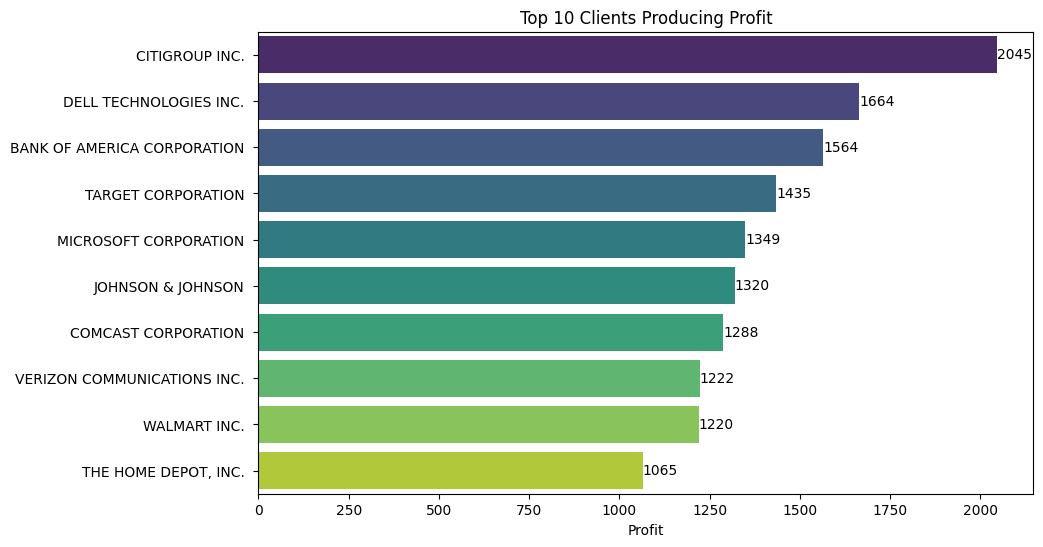

In [26]:

client_profit=df.groupby('Client')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax=sns.barplot(x=client_profit.values,y=client_profit.index, palette='viridis')  #kljucna razlika
plt.xlabel('Profit')
plt.ylabel('')
plt.title('Top 10 Clients Producing Profit')
for lab in ax.containers:
    ax.bar_label(lab)
plt.show()

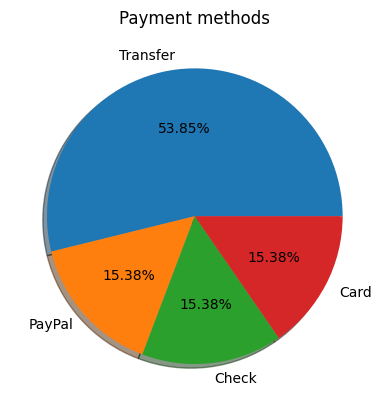

In [12]:
df.Payment.value_counts().plot.pie(autopct='%1.2f%%', shadow = True)
plt.title('Payment methods')
plt.ylabel('')
plt.show()


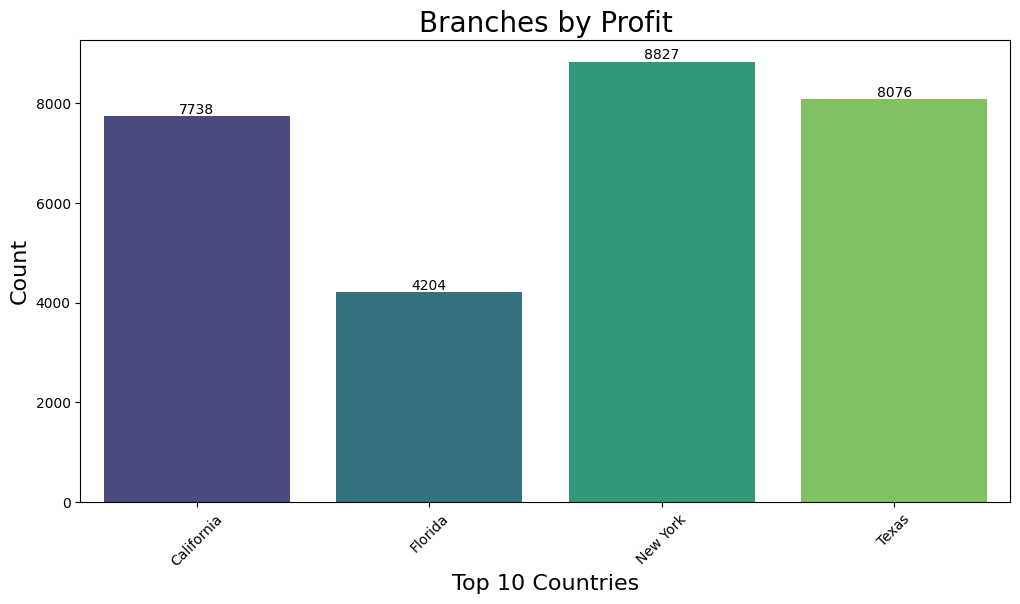

In [13]:
branch=df.groupby('Department_Branch')['Profit'].sum()
plt.figure(figsize=(12,6))
plt.title('Branches by Profit', fontsize=20)
ax = sns.barplot(x=branch.index, y=branch, palette='viridis')
plt.xlabel('Top 10 Countries', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

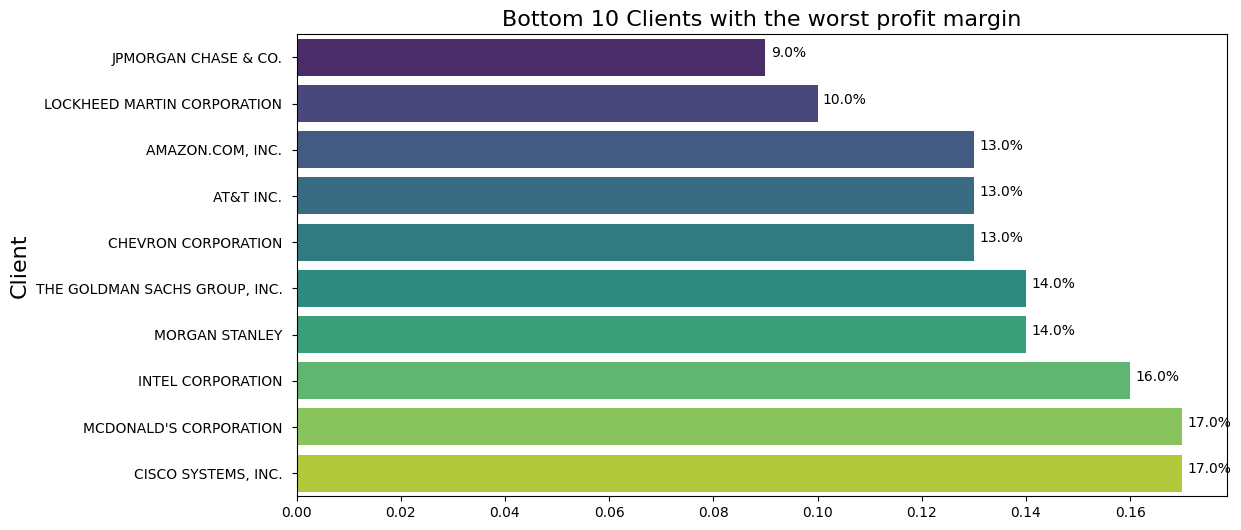

In [14]:
#

df2=df.dropna(subset=['Client','Profit Margin']) #izolacija nan values na samo odredjene columns

least_amount=df2.groupby('Client')['Profit Margin'].sum().sort_values(ascending=True).head(10)
plt.figure(figsize=(12,6))
plt.title('Bottom 10 Clients with the worst profit margin', fontsize=16)
plt.xlabel('')
plt.ylabel('Count', fontsize=16)
#plt.title('Top 10 Countries by Content Produced', fontsize=20)
ax=sns.barplot(x=least_amount.values, y=least_amount.index, palette='viridis')
#plt.xticks('')


total = len(least_amount)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width())
        x = p.get_x() + p.get_width() + 0.001
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
       


plt.show()
